<a href="https://colab.research.google.com/github/muditsatija08/Deep-Reinforcement-Learning-Hands-On/blob/master/cs6482_assign3_23256087_23158018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mudit Satija: 23256087

Vikrant Shah: 23158018

#Code runs without any error.

#Code is implimented by us and errors were removed with the help of chatGPT.

In [ ]:
!pip install gymnasium[atari]
!pip install keras-rl2
!pip install ale-py
!pip install gymnasium[accept-rom-license]
!pip install tensorflow==2.12.0

  Obtaining dependency information for tensorflow==2.12.0 from https://files.pythonhosted.org/packages/29/32/634f7277aee86101e74d50230e72795c33a5d3279320b78ac67e8f37454b/tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Obtaining dependency information for tensorflow-intel==2.12.0 from https://files.pythonhosted.org/packages/2c/14/5ae30837269512867efbfa7144b45e816db43b98e3f663f5a51a8148d5c3/tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for gast<=0.4.0,>=0.2.1 from https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675aeb673e58d2cb698e78510feceb11958c/gast-0.4.0-py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Obtaining dependency information for jax>=0.3.15 from https://files.pythonhosted.org/packages/20/11/6667e8a2146

In [ ]:
!pip install opencv-python
!pip install imageio[ffmpeg]

  Obtaining dependency information for imageio-ffmpeg from https://files.pythonhosted.org/packages/c6/01/716106099e48c4f419876d5814679a94dd7d6f441217c97c1b608123c6bb/imageio_ffmpeg-0.4.9-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/22.6 MB 3.2 MB/s eta 0:00:08
   ---------------------------------------- 0.2/22.6 MB 2.5 MB/s eta 0:00:09
    --------------------------------------- 0.4/22.6 MB 2.9 MB/s eta 0:00:08
   - -------------------------------------- 0.6/22.6 MB 3.3 MB/s eta 0:00:07
   - -------------------------------------- 1.0/22.6 MB 4.3 MB/s eta 0:00:05
   -- ------------------------------------- 1.3/22.6 MB 4.9 MB/s eta 0:00:05
   -- ------------------------------------- 1.6/22.6 MB 5.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.9/22.6 MB 5.4 MB/s eta 0:00:04
   ---- ----------------------------------- 2.3/22.6 MB 5.6 MB/s eta 0:00:04
   ---- ----------

In [ ]:
import numpy as np
import gymnasium as gym
import cv2
import random
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [ ]:
# Create the Atari environment
env = gym.make('Breakout-v4', render_mode='rgb_array')

In [ ]:
# Preprocess the frame
def preprocess_frame(frame):
    if frame is None:
        raise ValueError("Received a None frame for preprocessing")
    if not isinstance(frame, np.ndarray):
        raise TypeError(f"Expected frame to be a numpy array, but got {type(frame)}")
    if frame.shape != (210, 160, 3):
        raise ValueError(f"Expected frame shape (210, 160, 3), but got {frame.shape}")
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_AREA)
    return resized / 255.0

In [ ]:
# Stack frames
def stack_frames(stacked_frames, frame, is_new_episode):
    frame = preprocess_frame(frame)
    if is_new_episode:
        stacked_frames = np.stack([frame] * 4, axis=2)
    else:
        stacked_frames = np.concatenate((frame[..., np.newaxis], stacked_frames[..., :-1]), axis=2)
    return stacked_frames

In [ ]:
# Define the DQN model
def build_dqn(input_shape, action_space):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (8, 8), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (4, 4), strides=2, activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), strides=1, activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(action_space, activation='linear'))
    return model

In [ ]:
# Hyperparameters
state_size = (84, 84, 4)
action_size = env.action_space.n
learning_rate = 0.00025
total_episodes = 1000
max_steps = 200
batch_size = 64
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995

In [ ]:
# Initialize the models
dqn = build_dqn(state_size, action_size)
target_dqn = build_dqn(state_size, action_size)
dqn.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='mse')
target_dqn.set_weights(dqn.get_weights())

In [ ]:
# Replay memory
class ReplayBuffer:
    def __init__(self, size):
        self.buffer = []
        self.max_size = size
        self.index = 0

    def add(self, experience):
        if len(self.buffer) < self.max_size:
            self.buffer.append(experience)
        else:
            self.buffer[self.index] = experience
            self.index = (self.index + 1) % self.max_size

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

In [ ]:
replay_buffer = ReplayBuffer(size=1000000)

In [ ]:

# Initialize the replay buffer with the loaded data
replay_buffer = ReplayBuffer(buffer_size=len(replay_buffer_data))
replay_buffer.buffer = replay_buffer_data

TypeError: ReplayBuffer.__init__() got an unexpected keyword argument 'buffer_size'

In [ ]:
import pickle

# Function to save replay buffer to a file
def save_replay_buffer(replay_buffer, filename='replay_buffer.pkl'):
    with open(filename, 'wb') as f:
        pickle.dump(replay_buffer, f)

In [ ]:
import imageio

# Training the DQN
rewards_list = []
losses_list = []

# Video writer initialization
video_writer = imageio.get_writer('training_video.mp4', fps=30, codec='libx264')

def train_dqn():
    global epsilon

    for episode in range(total_episodes):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]  # Extract the frame if env.reset() returns a tuple
        state = stack_frames(None, state, True)
        total_reward = 0

        for step in range(max_steps):

            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                q_values = dqn.predict(np.expand_dims(state, axis=0))
                action = np.argmax(q_values)

            # Take action and observe the next state and reward
            next_state, reward, done, info, _ = env.step(action)

            if isinstance(next_state, tuple):
                next_state = next_state[0]  # Extract the frame if env.step() returns a tuple
            next_state = stack_frames(state, next_state, False)

            # Store experience in replay buffer
            replay_buffer.add((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward

            # If episode is done, break the loop
            if done:
                print(f"Episode: {episode+1}, Total Reward: {total_reward}")
                rewards_list.append(total_reward)
                break

            # Sample minibatch and train the DQN
            if len(replay_buffer.buffer) > batch_size:
                minibatch = replay_buffer.sample(batch_size)
                states, actions, rewards, next_states, dones = zip(*minibatch)

                target_qs = target_dqn.predict(np.array(next_states))
                targets = dqn.predict(np.array(states))

                for i in range(batch_size):
                    targets[i, actions[i]] = rewards[i] + gamma * np.max(target_qs[i]) * (1 - dones[i])

                history = dqn.fit(np.array(states), targets, epochs=1, verbose=0)
                losses_list.append(history.history['loss'][0])

            # Render and save frame to video
            frame = env.render()
            video_writer.append_data(frame)

        # Update target network weights
        if episode % 10 == 0:
            target_dqn.set_weights(dqn.get_weights())

        # Decay epsilon
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

    env.close()

    # Close the video writer
    video_writer.close()


In [ ]:
train_dqn()

C:\Users\mudit\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 331ms/step


In [ ]:
video_writer.close()

In [ ]:
#Q-Table
# Save the replay buffer
save_replay_buffer(replay_buffer.buffer, 'replay_buffer.pkl')

OSError: [Errno 28] No space left on device

In [ ]:
print(f'Replay buffer size: {len(replay_buffer.buffer)}')

Replay buffer size: 23263


In [ ]:
print(rewards_list, losses_list)

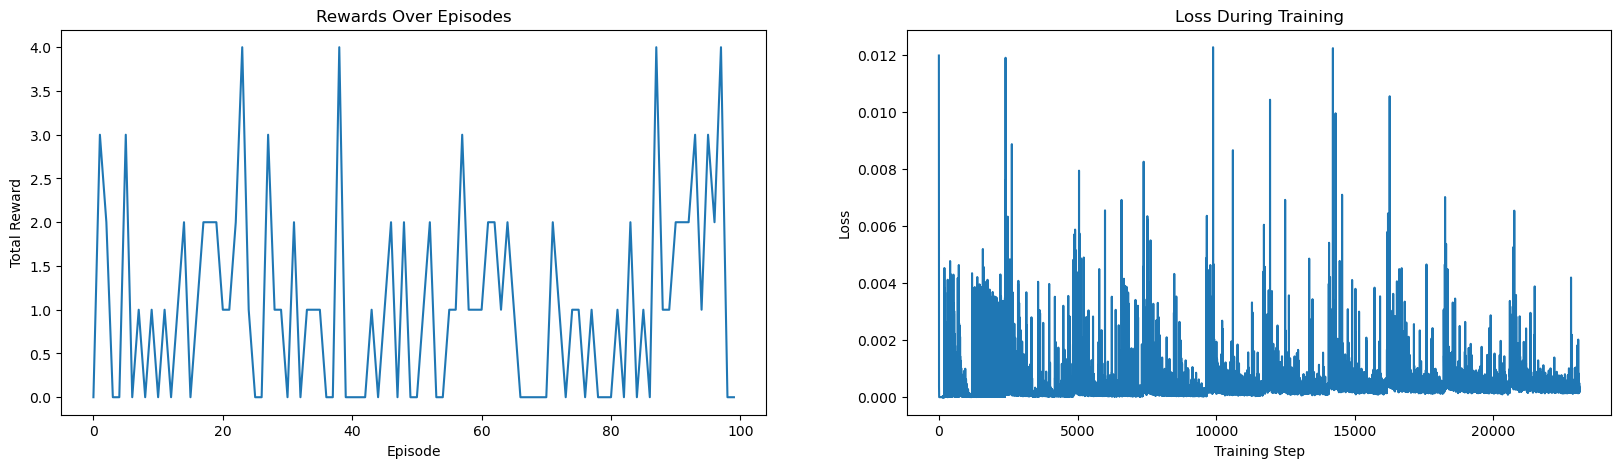

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_list)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Over Episodes')

plt.subplot(1, 2, 2)
plt.plot(losses_list)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Loss During Training')

plt.show()